# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The orginal data contain 21 columns and 10866 rows. I decided to drop 11 columns (id, imdb_id, cast, homepage, tagline, keywords, overview, release_date, revenue, budget,director) because of the irrelevance of this data to the questions that I will answer in this report, so the remaining columns will be:
'popularity', 'original_title','runtime', 'genres', 'production_companies','vote_count', 'vote_average', 'release_year', 'budget_adj','revenue_adj'.

Note: I will count on revenue_adj and budget_adj ranther than revenue and budget to standardized the value of money across the years.




### Question(s) for Analysis
What kinds of properties are associated with movies that have high revenues?
<br>The dependent variable: revenue the movies made.<br>
The independent variables: genres, budget, production companies, average vote,year of release.
<br>So we will answer the following 5 sub-questions to answer the main question:<br>
<br>1- What the most profitable genres?<br>
2- Is there is a correlation between budget and revenue?<br>
3- What the most and least profitable production companies in the list?<br>
4- Is there is a correlation between average vote and revenue?<br>
5- Is cinema become more or less profitable over time?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
I will drop this columns(id, imdb_id, cast, homepage, tagline, keywords, overview, release_date, revenue, budget,director) because It is irrelevant to my questions.
then drop the rows with missing values.

In [3]:
# drop the unwanted columns.
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'revenue', 'budget','director'],axis=1,inplace=True)
# drop the the rows with missing values in genres column.
df.dropna(subset=["genres"],inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 ( What the most profitable genres?)

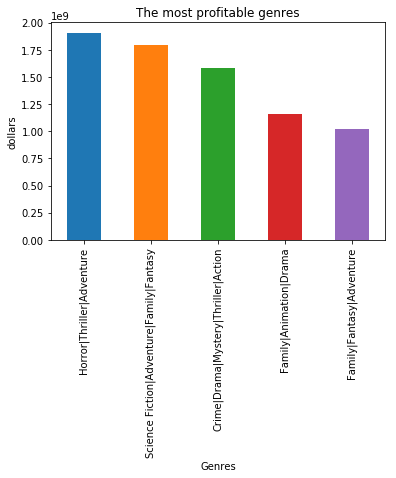

In [4]:
# get the mean of the five most profitable generes in the list.
df.groupby("genres")["revenue_adj"].mean().sort_values(ascending =False)[:5].plot(kind="bar");
#add title to the chart
plt.title("The most profitable genres");
#add a label to each axis
plt.xlabel("Genres");
plt.ylabel("dollars");

I found that the most five most profitable genres came as following:<br>
1- Horror|Thriller|Adventure                   
2- Science Fiction|Adventure|Family|Fantasy    
3- Crime|Drama|Mystery|Thriller|Action         
4- Family|Animation|Drama                      
5- Family|Fantasy|Adventure

### Research Question 2  (Is there is a correlation between budget and revenue?)

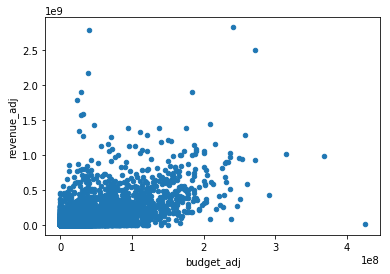

In [6]:
#Show the relationship between budget and revenue
df.plot.scatter('budget_adj', 'revenue_adj');

From the pervious chart we can say that there aren't srtong  correlation between what the production companies pay and what they get.

### Research Question 3  (What the most and least profitable production companies in the list?)

In [7]:
df.isnull().sum()


popularity                 0
original_title             0
runtime                    0
genres                     0
production_companies    1016
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data limitation!
About 1/10 of the data are missing and can't be replaced, so if we continue we will make inaccurate conclusion.

### Research Question 4  (Is there is a correlation between average vote and revenue?)


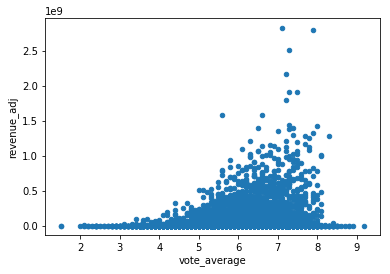

In [8]:
df.plot.scatter('vote_average', 'revenue_adj');

### Average vote score is good indicator of the revenue earned.
there is a positive relationship between average score and the revenue.

### Research Question 5  (Is cinema become more or less profitable over time?)


Text(0.5,1,'Film production revenue size over time')

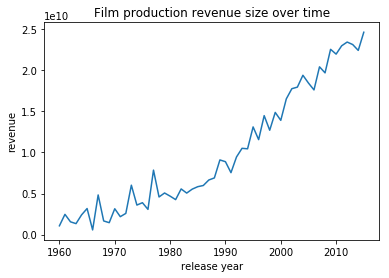

In [12]:
df.groupby("release_year")["revenue_adj"].sum().plot.line();
plt.xlabel("release year")
plt.ylabel("revenue")
plt.title("Film production revenue size over time")

### Film production become bigger and bigger over time.
The size and the revenue of cinema increased over time.

<a id='conclusions'></a>
### Conclusions
1- What the most profitable genres?<br>
&emsp;	I found that the most five most profitable genres came as following:<br>
&emsp;	1- Horror|Thriller|Adventure<br>
&emsp;	2- Science Fiction|Adventure|Family|Fantasy<br>
&emsp;	3- Crime|Drama|Mystery|Thriller|Action<br>
&emsp;	4- Family|Animation|Drama<br>
&emsp;	5- Family|Fantasy|Adventure<br>
<br>2- Is there is a correlation between budget and revenue?<br>
	&emsp;there aren't srtong correlation between what the production companies pay and what they get.<br>
<br>3- What the most and least profitable production companies in the list?
	&emsp;Data limitation!<br>
	&emsp;About 1/10 of the data are missing and can't be replaced, so if we continue we will make inaccurate analysis.<br>
<br>4- Is there is a correlation between average vote and revenue?<br>
	&emsp;there is a positive relationship between average score and the revenue.<br>
<br>5- Is cinema become more or less profitable over time?<br>
	&emsp;Film production become bigger and bigger over time.


### Limitations
When I tried to know the most profitable production companies there were about 10% of data missing so I stopped analysis this part. 


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0